가설함수 : x[0] * theta[0] + x[1] * theta[1]+ x[2] * theta[2] + ...

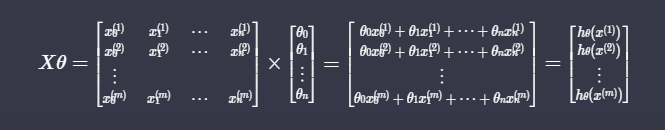

In [8]:
import numpy as np  
def prediciton(X,theta):
    #가설함수 
    return X.dot(theta)

error

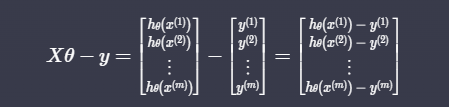

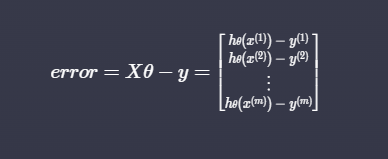

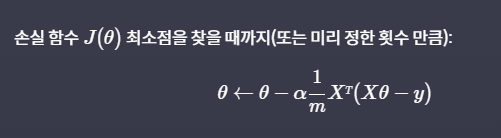

In [10]:
def gradient_descent(X, theta, y, iterations, alpha):
    m = len(X)

    for _ in range(iterations):
        error = prediciton(X,theta) - y
        theta = theta - alpha * 1/m * X.T.dot(error)
    return theta 

In [11]:
# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 목표 변수
house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 입력 변수 y 정의
y = house_price

# 파라미터 theta 초기화
theta = np.array([0, 0, 0, 0])

# 학습률 0.01로 100번 경사 하강
theta = gradient_descent(X, theta, y, 100, 0.01)

theta

array([0.11484521, 1.21120425, 0.18270523, 0.30060782])

#정규방정식 
MSE생각하면 됨 2/m *(error)^*2*

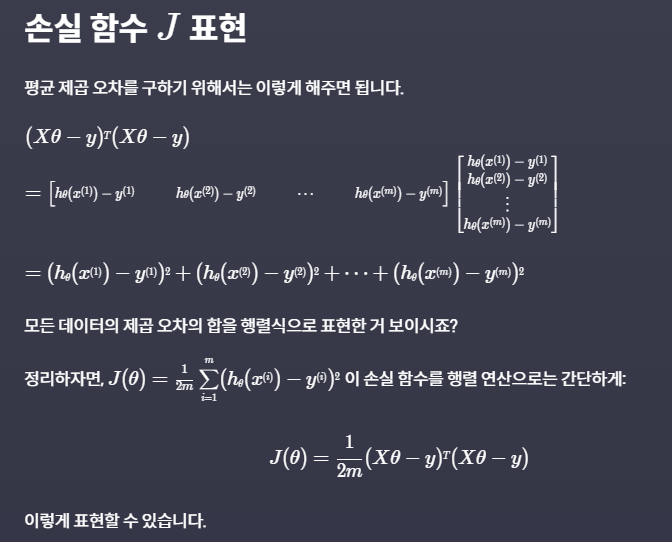

결론은 손실함수를 미분때리면 아래식이 나온다.
우리는 손실함수의 미분함수의 기울기가 0이 되는 theta을 찾고 싶어한다.(그게 손실함수의 최솟값이니깐)

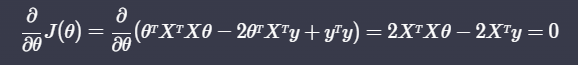

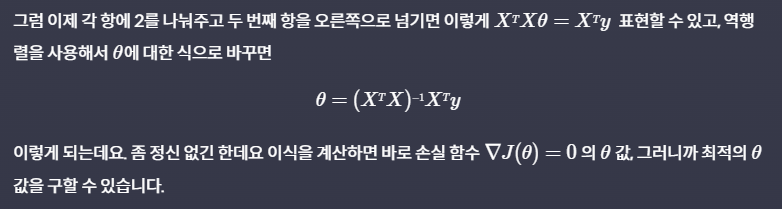

np.linalg.pinv 은 transform 과 같은 의미다. 

@ 는 내적 .dot() 과 같은 의미다.

In [12]:
import numpy

def normal_equation(X,y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y
# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 목표 변수
house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

# 입력 변수 파라미터 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 입력 변수 y 정의
y = house_price

# 정규 방적식으로 theta 계산
theta = normal_equation(X, y)
theta


array([ 5.24706322,  1.30727421, -0.68881811, -0.8709494 ])

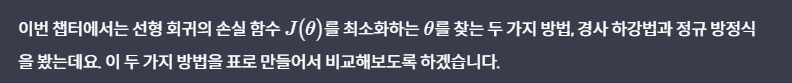

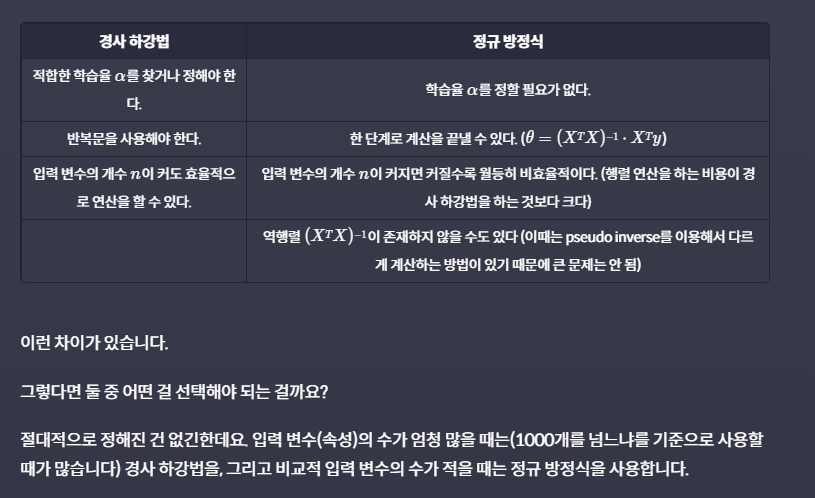

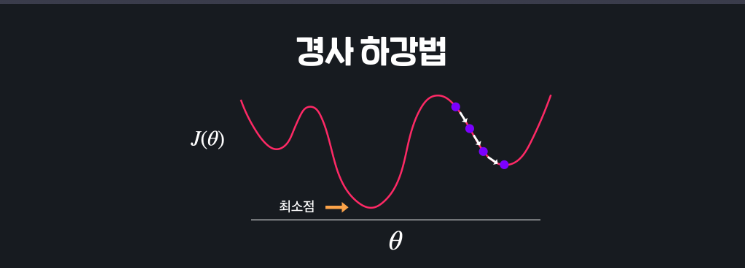

이 지점에서 시작을 해서 경사를 따라 쭉 내려갑니다. 내려가다가 보면 어느 순간 여러 극소값 중 하나에 오겠죠? 그럼 여기서는 경사가 0이어서 경사 하강이 종료가 될 텐데요. 그럼 손실 함수의 최저점을 찾아갈 수가 없습니다.

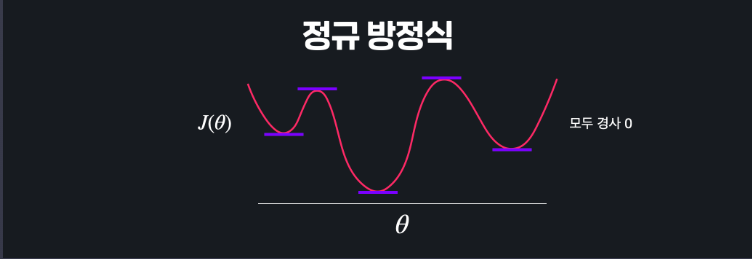

이렇게 수많은 극소값들과 극대값들이 있으면 아무리 방정식을 해결해도 구한 수많은 지점 중에서 어떤 지점이 최소점인지를 알 수가 없죠. 이 모든 지점들이 경사가 0일테니까요.

그러니까 함수가 이런 식으로 생긴 경우에는 경사 하강법과 정규 방정식을 통해서 구한 극소 지점이 손실 함수 전체에서 최소 지점이라고 확실하게 얘기할 수가 없는 건데요.

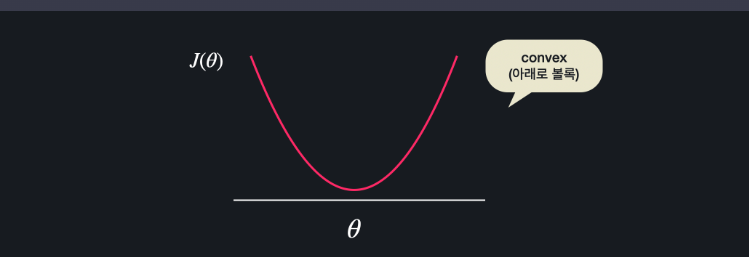

반대로 손실 함수가 이렇게 생겼다고 합시다.
이 함수는 어떤 지점에서 경사 하강을 시작해도 항상 손실 함수의 최소 지점을 찾을 수 있고, 정규 방정식을 이용해서 최소점을 구할 수 있겠죠?

이런 함수를 convex 함수(아래로 볼록한 함수)라고 부릅니다.

convex 함수에서는 항상 경사 하강법이나 정규 방정식을 이용해서 최소점을 구할 수 있는 반면, 노트 위에서 봤던 non-convex 함수에서는 구한 극소점이 최소점이라고 확신할 수 없죠.

선형 회귀의 평균 제곱 오차
선형 회귀에서는 가정 함수의 예측값들과 실제 목표 변수들의 평균 제곱 오차(MSE)를 손실 함수로 사용했는데요. 다행히 선형 회귀 손실 함수로 사용하는 MSE는 항상 convex 함수입니다. 그러니까 선형 회귀를 할 때는 경사 하강법을 하거나 정규 방정식을 하거나 항상 최적의 \thetaθ 값들을 구할 수 있는 거죠.